In [4]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
hpidb_data = pd.read_table("../database_files/mtb/hpidb/ob8gkx1635827600_s_list.mitab.txt", 
                           delimiter="\t")
hpidb_data

,protein_xref_1,protein_xref_2,alternative_identifiers_1,alternative_identifiers_2,protein_alias_1,protein_alias_2,detection_method,author_name,pmid,protein_taxid_1,protein_taxid_2,interaction_type,source_database_id,database_identifier,confidence
0,entrez gene/locuslink:257397,entrez gene/locuslink:887373,biogrid:129216|entrez gene/locuslink:TAB3,biogrid:4356823|entrez gene/locuslink:ptpA|ent...,entrez gene/locuslink:MAP3K7IP3(gene name syno...,entrez gene/locuslink:MPtpA(gene name synonym),psi-mi:MI:0096(pull down),Wang J (2015),pubmed:25642820,9606,83332,psi-mi:MI:0407(direct interaction),psi-mi:MI:0463(biogrid),biogrid:1418237,-
1,entrez gene/locuslink:257397,entrez gene/locuslink:887373,biogrid:129216|entrez gene/locuslink:TAB3,biogrid:4356823|entrez gene/locuslink:ptpA|ent...,entrez gene/locuslink:MAP3K7IP3(gene name syno...,entrez gene/locuslink:MPtpA(gene name synonym),psi-mi:MI:0004(affinity chromatography technol...,Wang J (2015),pubmed:25642820,9606,83332,psi-mi:MI:0915(physical association),psi-mi:MI:0463(biogrid),biogrid:1418235,-
2,entrez gene/locuslink:7097,entrez gene/locuslink:885362,biogrid:112952|entrez gene/locuslink:TLR2,biogrid:4354862|entrez gene/locuslink:PPE34|en...,entrez gene/locuslink:CD282(gene name synonym)...,-,psi-mi:MI:0096(pull down),Bansal K (2010),pubmed:20837474,9606,83332,psi-mi:MI:0407(direct interaction),psi-mi:MI:0463(biogrid),biogrid:1527992,-
3,uniprotkb:O60603,uniprotkb:P9WIG7,intact:EBI-973722|uniprotkb:O15454|uniprotkb:Q...,intact:EBI-9086211|uniprotkb:L0TGV1|uniprotkb:...,psi-mi:tlr2_human(display_long)|uniprotkb:Toll...,psi-mi:pe35_myctu(display_long)|uniprotkb:PE35...,psi-mi:MI:0006(anti bait coimmunoprecipitation),Tiwari et al. (2014),pubmed:24467650|imex:IM-22080,9606,83332,psi-mi:MI:0915(physical association),psi-mi:MI:0471(MINT),intact:EBI-9086396|imex:IM-22080-5,intact-miscore:0.40
4,uniprotkb:O60603,uniprotkb:P9WHW9,intact:EBI-973722|uniprotkb:O15454|uniprotkb:Q...,intact:EBI-9086224|uniprotkb:L0TFI2|uniprotkb:...,psi-mi:tlr2_human(display_long)|uniprotkb:Toll...,psi-mi:ppe68_myctu(display_long)|uniprotkb:PPE...,psi-mi:MI:0006(anti bait coimmunoprecipitation),Tiwari et al. (2014),pubmed:24467650|imex:IM-22080,9606,83332,psi-mi:MI:0915(physical association),psi-mi:MI:0471(MINT),intact:EBI-9086355|imex:IM-22080-4,intact-miscore:0.40
5,entrez gene/locuslink:1432,entrez gene/locuslink:887373,biogrid:107819|entrez gene/locuslink:MAPK14|en...,biogrid:4356823|entrez gene/locuslink:ptpA|ent...,entrez gene/locuslink:CSBP(gene name synonym)|...,entrez gene/locuslink:MPtpA(gene name synonym),psi-mi:MI:0004(affinity chromatography technol...,Wang J (2015),pubmed:25642820,9606,83332,psi-mi:MI:0915(physical association),psi-mi:MI:0463(biogrid),biogrid:1418239,-
6,entrez gene/locuslink:22190,entrez gene/locuslink:887373,biogrid:204403|entrez gene/locuslink:Ubc,biogrid:4356823|entrez gene/locuslink:ptpA|ent...,entrez gene/locuslink:2700054O04Rik(gene name ...,entrez gene/locuslink:MPtpA(gene name synonym),psi-mi:MI:0018(two hybrid),Wang J (2015),pubmed:25642820,10090,83332,psi-mi:MI:0407(direct interaction),psi-mi:MI:0463(biogrid),biogrid:1418231,-
7,entrez gene/locuslink:26416,entrez gene/locuslink:887373,biogrid:204969|entrez gene/locuslink:Mapk14|en...,biogrid:4356823|entrez gene/locuslink:ptpA|ent...,entrez gene/locuslink:CSBP2(gene name synonym)...,entrez gene/locuslink:MPtpA(gene name synonym),psi-mi:MI:0415(enzymatic study),Wang J (2015),pubmed:25642820,10090,83332,psi-mi:MI:0407(direct interaction),psi-mi:MI:0463(biogrid),biogrid:1418232,-
8,entrez gene/locuslink:26419,entrez gene/locuslink:887373,biogrid:204971|entrez gene/locuslink:Mapk8,biogrid:4356823|entrez gene/locuslink:ptpA|ent...,entrez gene/locuslink:AI849689(gene name synon...,entrez gene/locuslink:MPtpA(gene name synonym),psi-mi:MI:0415(enzymatic study),Wang J (2015),pubmed:25642820,10090,83332,psi-mi:MI:0407(direct interaction),psi-mi:MI:0463(biogrid),biogrid:1418233,-
9,uniprotkb:P10145,uniprotkb:P9WNX3,intact:EBI-39

In [54]:
phisto = pd.read_csv('../database_files/mtb/phisto/phi_data.csv')
phisto

,Pathogen,Taxonomy ID,Uniprot ID,Pathogen Protein,Uniprot ID.1,Human Protein,Experimental Method,Pubmed ID
0,Mycobacterium tuberculosis STRAIN H37Rv,83332,P9WHW9,PPE68_MYCTU,O60603,TLR2_HUMAN,anti bait coimmunoprecipitation,24467650
1,Mycobacterium tuberculosis STRAIN H37Rv,83332,P9WHW9,PPE68_MYCTU,O60603,TLR2_HUMAN,anti bait coimmunoprecipitation,24467650
2,Mycobacterium tuberculosis STRAIN H37Rv,83332,P9WIG7,PE35_MYCTU,O60603,TLR2_HUMAN,anti bait coimmunoprecipitation,24467650
3,Mycobacterium tuberculosis STRAIN H37Rv,83332,P9WIG7,PE35_MYCTU,O60603,TLR2_HUMAN,anti bait coimmunoprecipitation,24467650
4,Mycobacterium tuberculosis STRAIN H37Rv,83332,Q6MX51,Q6MX51_MYCTU,P10145,IL8_HUMAN,affinity chromatography technology,26829648
5,Mycobacterium tuberculosis STRAIN H37Rv,83332,Q6MX51,Q6MX51_MYCTU,P10145,IL8_HUMAN,affinity chromatography technology,26829648
6,Mycobacterium tuberculosis STRAIN H37Rv,83332,P9WMN3,GLMU_MYCTU,P10145,IL8_HUMAN,affinity chromatography technology,26829648
7,Mycobacterium tuberculosis STRAIN H37Rv,83332,P9WMN3,GLMU_MYCTU,P10145,IL8_HUMAN,affinity chromatography technology,26829648
8,Mycobacterium tuberculosis STRAIN H37Rv,83332,P9WNX3,SERA_MYCTU,P10145,IL8_HUMAN,affinity chromatography technology,26829648
9,Mycobacterium tuberculosis STRAIN H37Rv,83332,P9WNX3,SERA_MYCTU,P10145,IL8_HUMAN,affinity chromatography technology,26829648


In [57]:
phisto_list = list()

for i in range(0, len(phisto)):
    phisto_list.append((phisto['Uniprot ID'][i], phisto['Uniprot ID.1'][i]))
    
unique_phisto = list(set(phisto_list))
unique_phisto

[('A0A0H3A2T3', 'A0A024RAE4'),
 ('P9WNX3', 'P10145'),
 ('Q7D8M9', 'A0A0S2Z4S4'),
 ('P9WHW9', 'O60603'),
 ('P9WMN3', 'P10145'),
 ('Q6MX51', 'P10145'),
 ('P9WIG7', 'O60603'),
 ('P9WGV3', 'P10145')]

In [58]:
H = nx.Graph(name='Phisto Graph')
H.add_edges_from(unique_phisto)

In [4]:
# List that will house all the human proteins 
prot_1 = list()

# iter through the human prot column and pull out the 
for elem in hpidb_data.protein_alias_1:
    prot_1.append(elem.split(':')[1].split('(')[0])

MAP3K7IP3
MAP3K7IP3
CD282
tlr2_human
tlr2_human
CSBP
2700054O04Rik
CSBP2
AI849689
il8_human
il8_human
il8_human
il8_human
il8_human
il8_human
il8_human
il8_human
il8_human
il8_human
JNK
4921526G09Rik
HMG20


In [5]:
hpidb_data.protein_alias_2

0        entrez gene/locuslink:MPtpA(gene name synonym)
1        entrez gene/locuslink:MPtpA(gene name synonym)
2                                                     -
3     psi-mi:pe35_myctu(display_long)|uniprotkb:PE35...
4     psi-mi:ppe68_myctu(display_long)|uniprotkb:PPE...
5        entrez gene/locuslink:MPtpA(gene name synonym)
6        entrez gene/locuslink:MPtpA(gene name synonym)
7        entrez gene/locuslink:MPtpA(gene name synonym)
8        entrez gene/locuslink:MPtpA(gene name synonym)
9     psi-mi:sera_myctu(display_long)|uniprotkb:serA...
10    psi-mi:glmu_myctu(display_long)|uniprotkb:glmU...
11    psi-mi:sahh_myctu(display_long)|uniprotkb:ahcY...
12    psi-mi:q6mx51_myctu(display_long)|uniprotkb:Rv...
13    psi-mi:sahh_myctu(display_long)|uniprotkb:ahcY...
14    psi-mi:q6mx51_myctu(display_long)|uniprotkb:Rv...
15    psi-mi:sahh_myctu(display_long)|uniprotkb:ahcY...
16    psi-mi:q6mx51_myctu(display_long)|uniprotkb:Rv...
17    psi-mi:glmu_myctu(display_long)|uniprotkb:

## Add Protein In

If you look at `hpidb_data.protein_alias_2[2]` You will notice that it is just a '-'. When going back into the paper that it is referencing I found the name of the mtb protein. 'Rv1917c'. We should add that back into the column.

In [8]:
hpidb_data.protein_alias_2[2] = ':Rv1917c('


/var/folders/pj/v0z2h7512pq3n12pjwnq1nxh0000gn/T/ipykernel_40467/3072858217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpidb_data.protein_alias_2[2] = ':Rv1917c('


protein_xref_1                                      entrez gene/locuslink:7097
protein_xref_2                                    entrez gene/locuslink:885362
alternative_identifiers_1            biogrid:112952|entrez gene/locuslink:TLR2
alternative_identifiers_2    biogrid:4354862|entrez gene/locuslink:PPE34|en...
protein_alias_1              entrez gene/locuslink:CD282(gene name synonym)...
protein_alias_2                                                      :Rv1917c(
detection_method                                     psi-mi:MI:0096(pull down)
author_name                                                    Bansal K (2010)
pmid                                                           pubmed:20837474
protein_taxid_1                                                           9606
protein_taxid_2                                                          83332
interaction_type                            psi-mi:MI:0407(direct interaction)
source_database_id                                  

In [9]:
hpidb_data.columns

Index(['protein_xref_1', 'protein_xref_2', 'alternative_identifiers_1',
       'alternative_identifiers_2', 'protein_alias_1', 'protein_alias_2',
       'detection_method', 'author_name', 'pmid', 'protein_taxid_1',
       'protein_taxid_2', 'interaction_type', 'source_database_id',
       'database_identifier', 'confidence'],
      dtype='object')

In [17]:
storage_list = [] # [(human,mtb),]

# Iter and combine to make edge tuples for networkx
for i in range(0,len(hpidb_data)):
    storage_list.append((hpidb_data.protein_alias_1[i].split(':')[1].split('(')[0],
                        hpidb_data.protein_alias_2[i].split(':')[1].split('(')[0]))

    # All the unique combinations
unique_storage = set(storage_list)

In [14]:
hpidb_data.iloc[1,4]

'entrez gene/locuslink:MAP3K7IP3(gene name synonym)|entrez gene/locuslink:NAP1(gene name synonym)'

In [15]:
set(storage_list)

{('2700054O04Rik', 'MPtpA'),
 ('4921526G09Rik', 'MPtpA'),
 ('AI849689', 'MPtpA'),
 ('CD282', 'Rv1917c'),
 ('CSBP', 'MPtpA'),
 ('CSBP2', 'MPtpA'),
 ('HMG20', 'MPtpA'),
 ('JNK', 'MPtpA'),
 ('MAP3K7IP3', 'MPtpA'),
 ('il8_human', 'glmu_myctu'),
 ('il8_human', 'q6mx51_myctu'),
 ('il8_human', 'sahh_myctu'),
 ('il8_human', 'sera_myctu'),
 ('tlr2_human', 'pe35_myctu'),
 ('tlr2_human', 'ppe68_myctu')}

In [18]:
G = nx.Graph(name='Mtb Graph')
G.add_edges_from(list(unique_storage))

In [41]:
# Instantiate lists
mtb_prots = list()
human_prots = list()

# Grab out the human and mtb names
for i in G.nodes:
    if 'myc' in i or 'MP' in i or 'Rv1' in i:
        mtb_prots.append(i)
    else:
        human_prots.append(i)

# Create label dicts
mtb_names = dict(zip(mtb_prots, mtb_prots))
human_names = dict(zip(human_prots,human_prots))

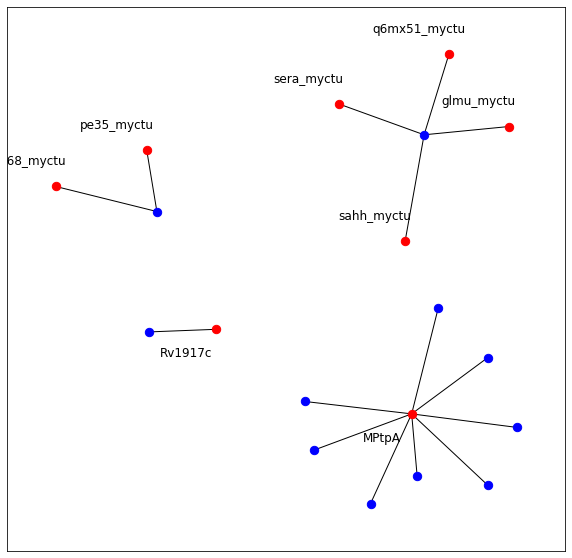

In [53]:
# Set fig dimenesions
plt.figure(figsize=(10,10))

# set the x,y cords for the nodes and edges
pos = nx.spring_layout(G, iterations=20, seed=81048)

# Draw out the mtb nodes
nx.draw_networkx_nodes(G, 
                       pos, 
                       node_size=70,
                      nodelist = mtb_prots,
                      node_color='red')
# Draw out the human nodes
nx.draw_networkx_nodes(G,
                      pos,
                      node_size=70,
                      nodelist = human_prots,
                      node_color = "blue")


# Change the positioning so that I can add labels that are above the nodes
pos_higher = dict()
for k, v in pos.items():
    if(v[1]>0):
        pos_higher[k] = (v[0]-0.1, v[1]+0.1)
    else:
        pos_higher[k] = (v[0]-0.1, v[1]-0.1)

# Add the labels
nx.draw_networkx_labels(G,
                       pos_higher,
                       labels=mtb_names)
# Draw the edges
nx.draw_networkx_edges(G, pos)

plt.show()

## Phisto Data

Phisto Graph

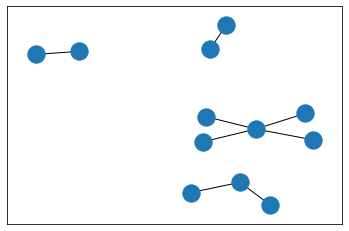

In [61]:
pos = nx.spring_layout(H, iterations=20, seed=1024)

nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_edges(H, pos)

plt.show()

# Mtb Paper Edge Creation

Seeing as we do not have access to the raw data for the PPIN data that was used to create the PPIN in the mtb paper that Parissa gave to us, we will instead manually create it. 

Paper: https://www.sciencedirect.com/science/article/pii/S1097276518305574?via%3Dihub

In [2]:
# List of edge tuples
mtb_paper_right = [
    ('Rv3705c', 'CDKN2A'),
    ('Rv2074', 'HTATSF1'),
    ('Rv2074', 'CAPZB'),
    ('Rv2074', 'KIAA0196'),
    ('Rv2074', 'VPRBP'),
    ('Rv2074', 'FKBP15'),
    ('Rv2074', 'LTV1'),
    ('Rv2074', 'VCP'),
    ('Rv2074', 'ATG4B'),
    ('Rv2074', 'NSFL1C'),
    ('Rv2074', 'IWS1'),
    ('Rv2074', 'NPM1'),
    ('Rv2074', 'RPLP2'),
    ('Rv2074', 'RPLP0'),
    ('LpqN', 'SF1'),
    ('LpqN', 'ERO1L'),
    ('LpqN', 'NAP1L4'),
    ('LpqN', 'GLT25D1'),
    ('LpqN', 'KIAA0907'),
    ('LpqN', 'SOWAHD'),
    ('LpqN', 'VIPAS39'),
    ('LpqN', 'VPS33B'),
    ('LpqN', 'TNRC6B'),
    ('LpqN', 'FMNL1'),
    ('LpqN', 'DIAPH2'),
    ('LpqN', 'PLOD3'),
    ('LpqN', 'MTHFD1'),
    ('LpqN', 'KCTD5'),
    ('LpqN', 'CBL'),
    ('LpqN', 'C22orf28'),
    ('LpqN', 'DDX1'),
    ('LpqN', 'TARDBP'),
    ('LpqN', 'C14orf166'),
    ('LpqN', 'GIGYF2'),
    ('LpqN', 'YTHDF3'),
    ('LpqN', 'EIF4E2'),
    ('LpqN', 'EIF3C'),
    ('LpqN', 'AGO2'),
    ('LpqN', 'SCYL2'),
    ('Rv1984c', 'HECTD1'),
    ('Rv0999', 'SORBS1'),
    ('EspB', 'HNRNPUL1'),
    ('EspB', 'DAZAP1'),
    ('EspB', 'YTHFD1'),
    ('EspB', 'NUP21'),
    ('EspB', 'NUP88'),
    ('PE35', 'NUP153'),
    ('PE35', 'DYNLL1'),
    ('Rv1906c', 'DHPS'),
    ('Rv1906c', 'GLUL'),
    ('Rv1906c', 'EZR'),
    ('Rv3722c', 'CCT3'),
    ('Rv3722c', 'CCT8'),
    ('Rv3722c', 'CCT4'),
    ('Rv3722c', 'CCT2'),
    ('Rv3722c', 'CCT7'),
    ('Rv3722c', 'CCT6A'),
    ('Rv3722c', 'CCT5'),
    ('PPE11', 'TMED10'),
    ('PPE11', 'MOGS'),
    ('Rv2469c', 'AIMP2'),
    ('Rv2469c', 'RARS'),
    ('Rv2469c', 'EPRS'),
    ('Rv2469c', 'MARS'),
    ('Rv2469c', 'RCN2'),
    ('Rv2469c', 'TIMM13'),
    ('Rv2469c', 'TIMM8A'),
    ('Rv2469c', 'OLA1'),
    ('Rv2469c', 'TUFM'),
    ('Rv2469c', 'DICER1'),
    ('Rv2401', 'RPS3A'),
    ('Rv2401', 'USP11'),
    ('Cfp6', 'RLP13'),
    ('Cfp6', 'IPO5'),
    ('Cfp6', 'IFI30'),
    ('Rv3033', 'NAP1L1'),
    ('Rv3033', 'ZC3H7A'),
    ('Rv3033', 'IL16'),
    ('Rv3033', 'PCBP1'),
    ('Rv3033', 'LASP1'),
    ('Rv3668c', 'HCFC1'),
    ('Rv1498a', 'HNRNPA1'),
    ('Rv1074c', 'RPL22'),
    ('Rv1074c', 'PPP6C'),
    ('Rv1074c', 'DLD'),
    ('Rv1074c', 'RBBP5'),
    ('Rv1074c', 'ASH2L'),
    ('Rv1074c', 'DPY30'),
    ('Rv1074c', 'PPP2R1A'),
    ('Rv1074c', 'PPP2CB'),
    ('Rv1074c', 'PPP2R2A'),
    ('Rv1074c', 'HNRNPK')
]

In [5]:
M = nx.Graph(name='Mtb Paper Edges Right')
M.add_edges_from(mtb_paper_right)

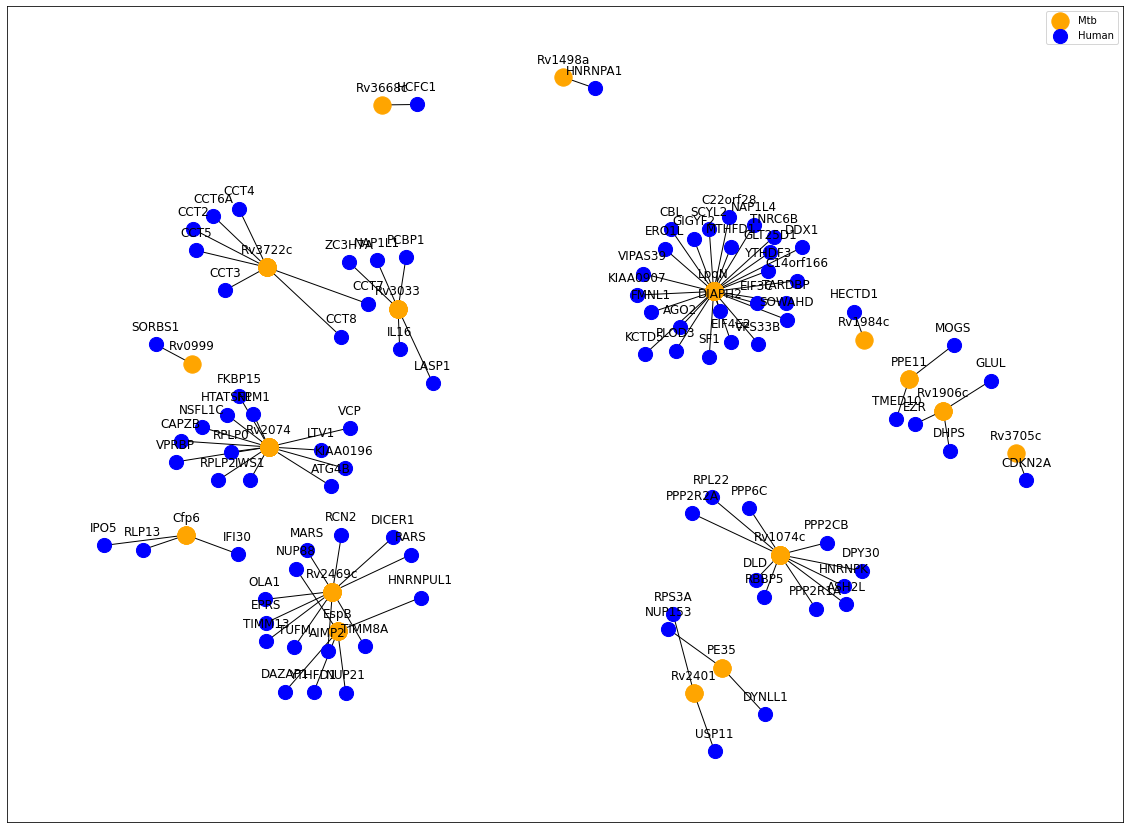

In [19]:
plt.figure(figsize=(20,15))

mtb_prots = list()
human_prots = list()
for i in mtb_paper_right:
    mtb_prots.append(i[0])
    human_prots.append(i[1])
    
pos = nx.spring_layout(M, iterations=20, seed=2058)

nx.draw_networkx_nodes(M,
                      pos,
                      node_size = 300,
                      node_color = 'orange',
                      nodelist=mtb_prots,
                      label='Mtb')
nx.draw_networkx_nodes(M,
                      pos,
                      node_size = 200,
                      node_color = 'blue',
                      nodelist=human_prots,
                      label="Human")

nx.draw_networkx_edges(M, pos)


for l in pos:
    pos[l][1] += 0.05

nx.draw_networkx_labels(M, pos)
plt.legend(scatterpoints=1)

plt.savefig('/Users/andrewpowers/bioinformatics/parisa_project/Network-based-study-of-the-role-of-host-pathogen-interactions/images/mtb_rightside_paper.png')
